# Climate Change Sentiment Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Ifeoluwa AYODELE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### South African Language Identification Hack 2023

**Overview:**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. 


**Proccess**

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of predicting tweets;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning and natural language processing
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

# Text processing and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import string


# Model training and evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix


from IPython.display import Image  # Library for displaying images in Jupyter Notebook


# Data preprocessing and evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Filter and ignore specific warning types
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

### Loading experiments to Comet

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [4]:
# look at data statistics
df_train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [5]:
df_test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
df_train.shape

(33000, 2)

In [7]:
df_train.describe().T

,count,unique,top,freq
lang_id,33000,11,xho,3000
text,33000,29948,ngokwesekhtjheni yomthetho ophathelene nalokhu...,17


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Observation:**
* It shows that we only have two numerical columns and one string column.
* However, we suspect that one of these columns (tweetid) includes unique values in each row, whilst the other column (sentiment) represents our label, and so contains more than two different values.

**Action**
* To establish this guess, we write a function that will reveiw the unique values


### Missing values and blank strings 

In [9]:
#Check for null values
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

**Observation:**
* The training dataset has no null values within it.
* The test dataset has no null values within it.

In [11]:
unique_language = list(df_train.lang_id.unique())
print(unique_language)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


**Class Description (given)**

* 2 News: the tweet links to factual news about climate change

* 1 Pro: the tweet supports the belief of man-made climate change

* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

* -1 Anti: the tweet does not believe in man-made climate change Variable definitions

**Features**

* sentiment: Which class a tweet belongs in (refer to Class Description above)

* message: Tweet body

* tweetid: Twitter unique id

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
df_test = df_test.drop('index', axis=1)
df_test.head(5)

,text
0,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,Tshivhumbeo tshi fana na ngano dza vhathu.
3,Kube inja nelikati betingevakala kutsi titsini...
4,Winste op buitelandse valuta.


In [18]:
#concatinate test and train for easy data processing

df=pd.concat([df_train,df_test])

df.tail()

,lang_id,text
5677,NaN,You mark your ballot in private.
5678,NaN,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,NaN,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,NaN,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,NaN,Vakatjhela iwebhusayidi yethu ku-www.


In [19]:
df_new =df

#Check for null values
df_new.isnull().sum()

lang_id    5682
text          0
dtype: int64

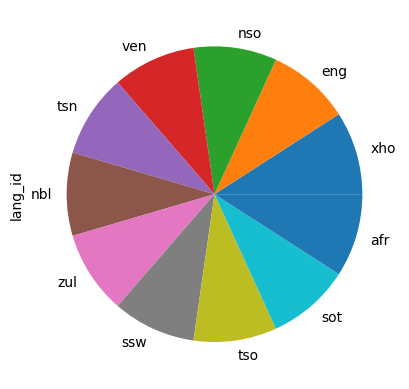

In [21]:
df_new['lang_id'].value_counts().plot(kind = 'pie')
plt.show()

**Observations:**

* The entire number of tweets related to news, neutral, and anti is less than half of the overall number of tweets.
* The distribution suggests that the train dataset has a class imbalance.  The effect of this imbalance, 
* The training dataset is skewed to the Pro sentiment category indicating a strong support for the belief of man-made climate change.

**Implications**
* If not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (Pro) but performs way lesser at classifying the Anti tweets.

### Data Preprocessing

The dataset contains punctuations, links, emojis and twitter specific characters like @ and # symbols. Words also exist in different cases which models might translate and different. Hence, the proceeding function performs cleaning by:
- Remove URLs
- Remove hastags and mentions
- Remove emojis and emoticons
- Remove puntuations, numbers
- Remove retweets and quotes, etc.



In [23]:
Image(url='https://eurovisionireland.files.wordpress.com/2014/02/attention.png')

In [24]:
#convert the message feature to string type
df_new['text'] = df_new['text'].astype(str)

In [25]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_new['text'] = df_new['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [26]:
df_new.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Remove Punctuations**

In [27]:
df_new['text'] = df_new['text'].str.lower()

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [32]:
df_new['text'] = df_new['text'].apply(remove_punctuation)
df_new['text'].iloc[203]

'xiyenge xo toloveleka xa vuthori hi laha bindzu ndhawu kumbe munhu wa xihundla a tsarisaka hi ndlela yinwana ni mfumo kumbe vale henhla lava endlaka migingiriko vutsarisi byi katsa ku hlengeleta ka swibalo ku endla ka uif ku ngenisa xandla eku endleni ka uif ku va ni vupfumeleri bya bindzu'

**Tokenization**

In [34]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [35]:
tokeniser = TreebankWordTokenizer()
df_new['tokens'] = df_new['text'].apply(tokeniser.tokenize)

In [36]:
df_new['tokens'].iloc[203]

['xiyenge',
 'xo',
 'toloveleka',
 'xa',
 'vuthori',
 'hi',
 'laha',
 'bindzu',
 'ndhawu',
 'kumbe',
 'munhu',
 'wa',
 'xihundla',
 'a',
 'tsarisaka',
 'hi',
 'ndlela',
 'yinwana',
 'ni',
 'mfumo',
 'kumbe',
 'vale',
 'henhla',
 'lava',
 'endlaka',
 'migingiriko',
 'vutsarisi',
 'byi',
 'katsa',
 'ku',
 'hlengeleta',
 'ka',
 'swibalo',
 'ku',
 'endla',
 'ka',
 'uif',
 'ku',
 'ngenisa',
 'xandla',
 'eku',
 'endleni',
 'ka',
 'uif',
 'ku',
 'va',
 'ni',
 'vupfumeleri',
 'bya',
 'bindzu']

In [40]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [44]:
from nltk.util import ngrams

def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [45]:
[x for x in ngrams(df_new.iloc[203]['tokens'], 2)]

[('xiyenge', 'xo'),
 ('xo', 'toloveleka'),
 ('toloveleka', 'xa'),
 ('xa', 'vuthori'),
 ('vuthori', 'hi'),
 ('hi', 'laha'),
 ('laha', 'bindzu'),
 ('bindzu', 'ndhawu'),
 ('ndhawu', 'kumbe'),
 ('kumbe', 'munhu'),
 ('munhu', 'wa'),
 ('wa', 'xihundla'),
 ('xihundla', 'a'),
 ('a', 'tsarisaka'),
 ('tsarisaka', 'hi'),
 ('hi', 'ndlela'),
 ('ndlela', 'yinwana'),
 ('yinwana', 'ni'),
 ('ni', 'mfumo'),
 ('mfumo', 'kumbe'),
 ('kumbe', 'vale'),
 ('vale', 'henhla'),
 ('henhla', 'lava'),
 ('lava', 'endlaka'),
 ('endlaka', 'migingiriko'),
 ('migingiriko', 'vutsarisi'),
 ('vutsarisi', 'byi'),
 ('byi', 'katsa'),
 ('katsa', 'ku'),
 ('ku', 'hlengeleta'),
 ('hlengeleta', 'ka'),
 ('ka', 'swibalo'),
 ('swibalo', 'ku'),
 ('ku', 'endla'),
 ('endla', 'ka'),
 ('ka', 'uif'),
 ('uif', 'ku'),
 ('ku', 'ngenisa'),
 ('ngenisa', 'xandla'),
 ('xandla', 'eku'),
 ('eku', 'endleni'),
 ('endleni', 'ka'),
 ('ka', 'uif'),
 ('uif', 'ku'),
 ('ku', 'va'),
 ('va', 'ni'),
 ('ni', 'vupfumeleri'),
 ('vupfumeleri', 'bya'),
 ('bya', 'bi

In [46]:
[x for x in ngrams(df_new.iloc[203]['tokens'], 3)]

[('xiyenge', 'xo', 'toloveleka'),
 ('xo', 'toloveleka', 'xa'),
 ('toloveleka', 'xa', 'vuthori'),
 ('xa', 'vuthori', 'hi'),
 ('vuthori', 'hi', 'laha'),
 ('hi', 'laha', 'bindzu'),
 ('laha', 'bindzu', 'ndhawu'),
 ('bindzu', 'ndhawu', 'kumbe'),
 ('ndhawu', 'kumbe', 'munhu'),
 ('kumbe', 'munhu', 'wa'),
 ('munhu', 'wa', 'xihundla'),
 ('wa', 'xihundla', 'a'),
 ('xihundla', 'a', 'tsarisaka'),
 ('a', 'tsarisaka', 'hi'),
 ('tsarisaka', 'hi', 'ndlela'),
 ('hi', 'ndlela', 'yinwana'),
 ('ndlela', 'yinwana', 'ni'),
 ('yinwana', 'ni', 'mfumo'),
 ('ni', 'mfumo', 'kumbe'),
 ('mfumo', 'kumbe', 'vale'),
 ('kumbe', 'vale', 'henhla'),
 ('vale', 'henhla', 'lava'),
 ('henhla', 'lava', 'endlaka'),
 ('lava', 'endlaka', 'migingiriko'),
 ('endlaka', 'migingiriko', 'vutsarisi'),
 ('migingiriko', 'vutsarisi', 'byi'),
 ('vutsarisi', 'byi', 'katsa'),
 ('byi', 'katsa', 'ku'),
 ('katsa', 'ku', 'hlengeleta'),
 ('ku', 'hlengeleta', 'ka'),
 ('hlengeleta', 'ka', 'swibalo'),
 ('ka', 'swibalo', 'ku'),
 ('swibalo', 'ku', 'en

In [47]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer()
vect.fit(df_new['text'])

CountVectorizer()

In [48]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [49]:
betterVect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 1))

In [50]:
betterVect.fit(df_new['text'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

**Splitting Data**

Let's divide our data back to test and train set.

In [53]:
df_fortrain= df_new[:len(df_train)]
df_fortest= df_new[len(df_train):].drop('lang_id',axis=1)

df_fortrain.head(10)

,lang_id,text,tokens,stem
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, provinc, of, kwazulunat, depart, of, tra..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,"[dinyakišišo, tše, tša, go, dirwa, gabedi, ka,...","[dinyakišišo, tše, tša, go, dirwa, gabedi, ka,..."
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,"[kgetse, nngwe, le, nngwe, e, e, sa, faposiwan...","[kgets, nngwe, le, nngwe, e, e, sa, faposiwang..."
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,"[mbadelo, dze, dza, laelwa, dzi, do, kwama, ma...","[mbadelo, dze, dza, laelwa, dzi, do, kwama, ma..."
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,"[maloko, a, dikhuduthamaga, a, ikarabela, mong...","[maloko, a, dikhuduthamaga, a, ikarabela, mong..."
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,"[fa, le, dirisiwa, lebone, le, tshwanetse, go,...","[fa, le, dirisiwa, lebon, le, tshwanets, go, b..."


### Spliting Train Dataset 

To ensure proper model evaluation, it is essential to assess the model's performance on unseen data. Consequently, it is necessary to slipt the training dataset into two distinct subsets: the training dataset, utilized for model training, and the validation set, employed to evaluate the model's performance.

In [55]:
from sklearn.model_selection import train_test_split

# split data
X = df_fortrain.drop('lang_id',axis=1)
y =df_fortrain['lang_id']


x_test = df_fortest

### Modelling

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have preprocessed tweet data and corresponding labels
# X represents the feature matrix of tweet data, y represents the corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train['text'])

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test['text'])

# Transform the original testing data
x_test_transformed = vectorizer.transform(x_test['text'])

**SVM Classifier**

In [59]:
# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_transformed)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9940909090909091


**MLP Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Convert the target labels to numeric representation
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train_transformed, y_train_encoded)

# Evaluate the model on the test set
accuracy = model.score(X_test_transformed, y_test_encoded)
print("Accuracy:", accuracy)


**Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_transformed, y_train_encoded)

# Evaluate the model on the test set
accuracy = rf_model.score(X_test_transformed, y_test_encoded)
print("Accuracy:", accuracy)

**GradientBoostingClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier


# Define the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_transformed, y_train_encoded)

# Evaluate the model on the test set
accuracy = gb_model.score(X_test_transformed, y_test_encoded)
print("Accuracy:", accuracy)

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
A = df_fortrain['stem']
b = df_fortrain['lang_id']

# Split the data into training and testing sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Predict the labels for the testing data
b_pred = logreg.predict(A_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


**DecisionTreeClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fit the decision tree model on the training data
tree.fit(A_train, b_train)

# Predict the labels for the testing data
dt_pred = tree.predict(A_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(b_test, dt_pred)
print("Accuracy:", accuracy)


**GaussianNB**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Create an instance of the Naive Bayes classifier
nb = GaussianNB()

# Fit the Naive Bayes model on the training data
nb.fit(A_train, b_train)

# Predict the labels for the testing data
nb_pred = nb.predict(A_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(b_test, nb_pred)
print("Accuracy:", accuracy)


In [60]:
svm.fit(X_train_transformed, y_train)
y_pred = svm.predict(x_test_transformed)

In [ ]:
model.fit(X_train_transformed, y_train_encoded)
m_pred = model.predict(x_test_transformed)

In [ ]:
rf_model.fit(X_train_transformed, y_train_encoded)
rf_pred = rf_model.predict(x_test_transformed)

In [ ]:
gb_model.fit(X_train_transformed, y_train_encoded)
gb_pred = gb_model.predict(x_test_transformed)

In [ ]:
logreg.fit(A_train, b_train)
b_pred = logreg.predict(x_test_transformed)

In [ ]:
tree.fit(A_train, b_train)
dt_pred = tree.predict(x_test_transformed)

In [ ]:
nb.fit(A_train, b_train)
nb_pred = nb.predict(x_test_transformed)

In [69]:
daf=pd.DataFrame(y_pred,columns=['lang_id'])
daf.insert(0, "index", range(1, len(daf) + 1))

daf.tail()

,index,lang_id
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot
5681,5682,xho


In [72]:
daf.to_csv('Ifeoluwa Submission.csv', index=False)

In [73]:
dfs= pd.read_csv('Ifeoluwa Submission.csv')
dfs.tail()

,index,lang_id
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot
5681,5682,xho
